 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale = pd.read_csv("Resources/whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Reading whale returns
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale = whale.dropna()

In [6]:
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
whale.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algo = pd.read_csv("Resources/algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

In [9]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo = algo.dropna()

In [11]:
algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [12]:
algo.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P TSX 60 Closing Prices
sptsx = pd.read_csv("Resources/sp_tsx_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

In [14]:
# Check Data Types
sptsx.dtypes

Close    object
dtype: object

In [15]:
# Fix Data Types
sptsx["Close"] = sptsx["Close"].str.replace("$", "")
sptsx["Close"] = sptsx["Close"].str.replace(",", "")
sptsx["Close"] = sptsx["Close"].astype("float")

In [16]:
sptsx.dtypes

Close    float64
dtype: object

In [17]:
sptsx.head(10)

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
2012-10-09,12273.57
2012-10-10,12212.42
2012-10-11,12233.95
2012-10-12,12202.04


In [18]:
# Calculate Daily Returns
sptsx_dly_rtrns = sptsx.pct_change()
sptsx_dly_rtrns.head(10)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608


In [19]:
# Drop nulls
sptsx = sptsx.dropna()

In [20]:
# Rename `Close` Column to be specific to this portfolio.
sptsx = sptsx.rename(columns={
    "Close": "S&P TSX 60 Close"
})

sptsx_dly_rtrns = sptsx_dly_rtrns.rename(columns={
    "Close": "S&P TSX 60 Close"
})

In [21]:
sptsx.head(10)

,S&P TSX 60 Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
2012-10-09,12273.57
2012-10-10,12212.42
2012-10-11,12233.95
2012-10-12,12202.04


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined = pd.concat([whale, algo, sptsx_dly_rtrns], axis="columns", join="inner")
combined.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.002655


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

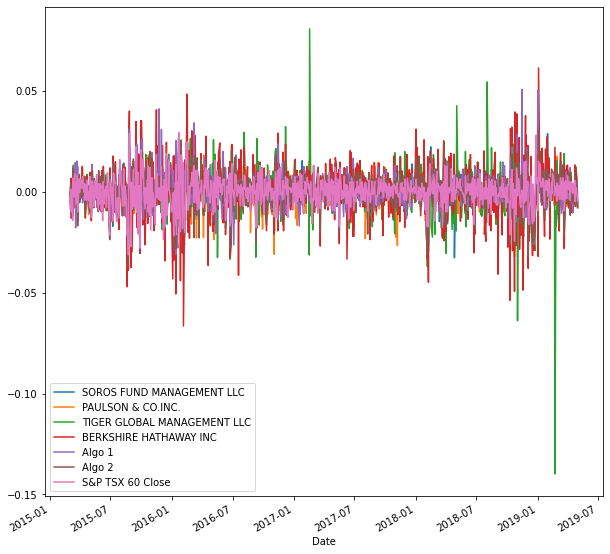

In [23]:
# Plot daily returns of all portfolios
combined.plot(kind="line", figsize=(10, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

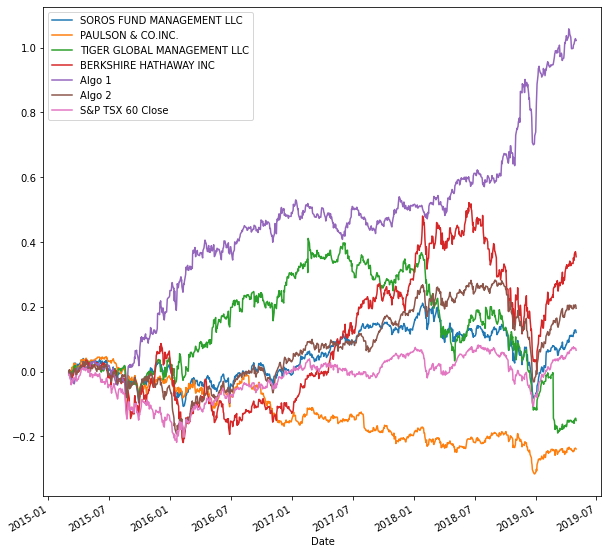

In [24]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined).cumprod()-1
# Plot cumulative returns
cumulative_returns.plot(kind="line", figsize=(10,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


#### Soros

<AxesSubplot:>

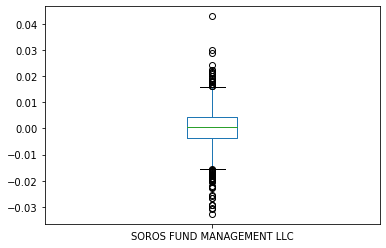

In [25]:
# Box plot to visually show risk
soros = whale["SOROS FUND MANAGEMENT LLC"]
soros.plot.box()

#### Paulson

<AxesSubplot:>

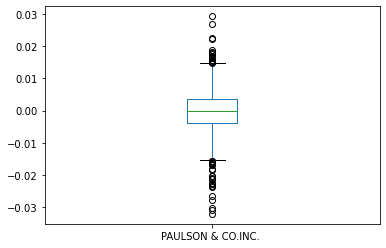

In [26]:
paulson = whale["PAULSON & CO.INC. "]
paulson.plot.box()

#### Tiger

<AxesSubplot:>

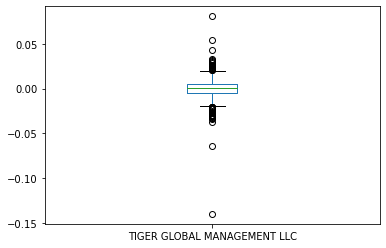

In [27]:
tiger = whale["TIGER GLOBAL MANAGEMENT LLC"]
tiger.plot.box()

#### Berkshire Hathaway

<AxesSubplot:>

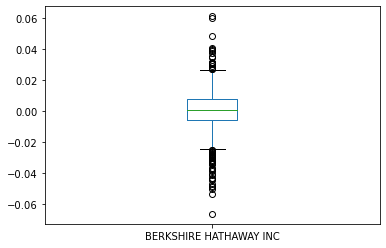

In [28]:
berk = whale["BERKSHIRE HATHAWAY INC"]
berk.plot.box()

#### Algo 1

<AxesSubplot:>

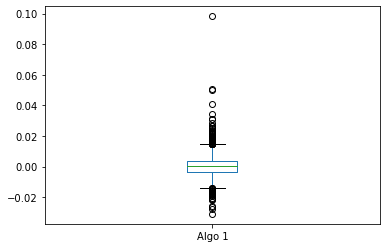

In [29]:
algo1 = algo["Algo 1"]
algo1.plot.box()

#### Algo 2

<AxesSubplot:>

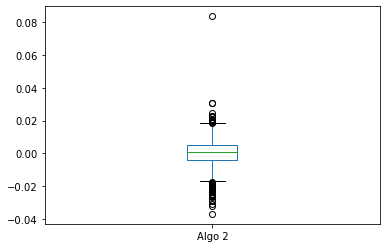

In [30]:
algo2 = algo["Algo 2"]
algo2.plot.box()

#### S&P TSX 60 

<AxesSubplot:>

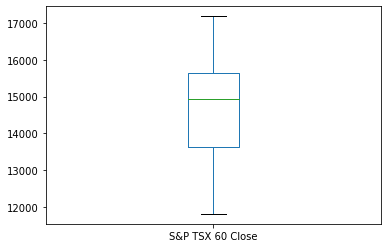

In [31]:
sptsx.plot.box()

### Calculate Standard Deviations

In [32]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined.std()
combined_std = combined_std.sort_values()
combined_std

PAULSON & CO.INC.              0.006982
S&P TSX 60 Close               0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

#### NOTE: if calculated directly from sp_tsx_history.csv file, the standard deviation for S&P TSX 60 is lower than its value in the combined table. The reason for this is that the parsing of dates truncated the data points used in this calculation. I will work from the 'combined' table to ensure my results pertain to the relevant data for the other portfolios. If I were to calculate it alone, it from all available data, the formula would be the following:

In [33]:
# Calculate  the daily standard deviation of S&P TSX 60
sptsx_std = sptsx_dly_rtrns.std()
sptsx_std

S&P TSX 60 Close    0.006637
dtype: float64

In [34]:
# Determine which portfolios are riskier than the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std = annualized_std.sort_values()
annualized_std.head(10)

PAULSON & CO.INC.              0.110841
S&P TSX 60 Close               0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

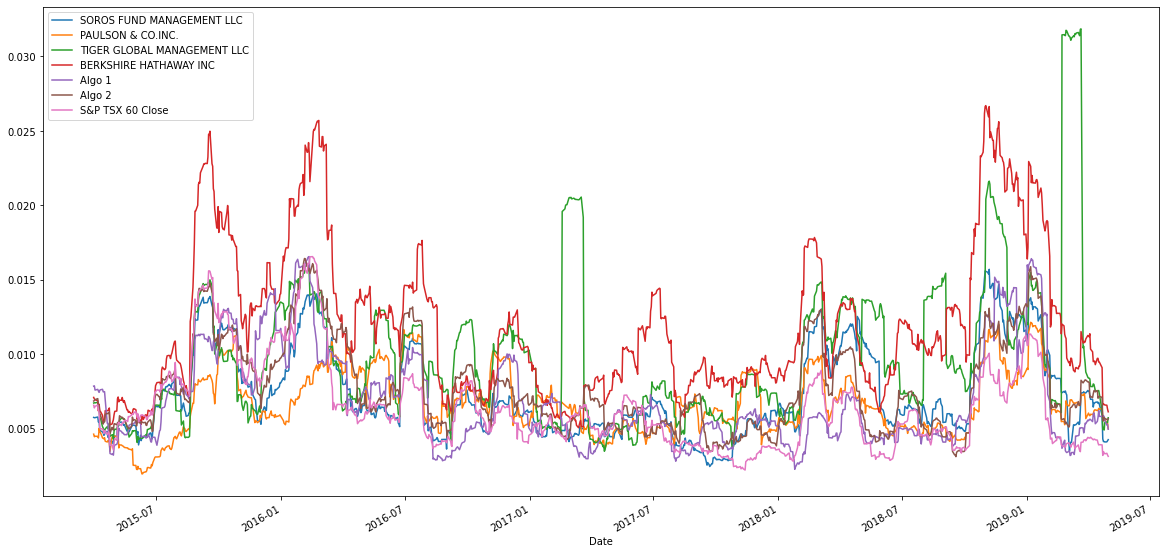

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined.rolling(window=21).std()
# Plot the rolling standard deviation
combined.rolling(window=21).std().plot(kind="line", figsize=(20,10))

### Calculate and plot the correlation

In [37]:
# Calculate the correlation
correlation = combined.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Close
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60 Close,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

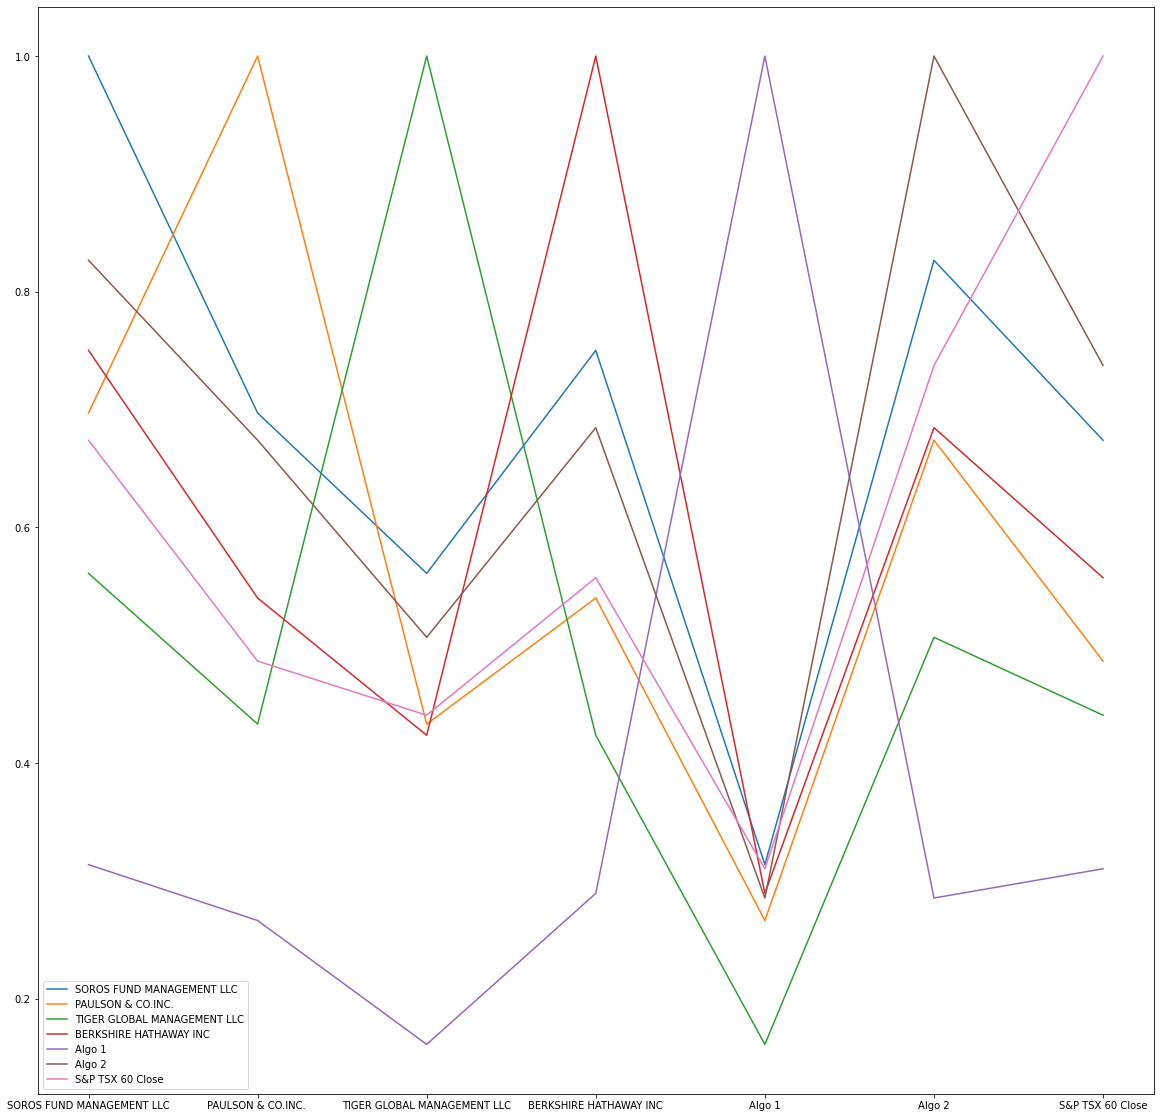

In [38]:
correlation.plot(figsize=(20,20))

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [39]:
# Cablculate covariance of a single portfolio
berk_var = combined['BERKSHIRE HATHAWAY INC'].var()
berk_var

0.00016449386147845125

In [40]:
# Computing simple beta
covar = combined['BERKSHIRE HATHAWAY INC'].cov(combined['S&P TSX 60 Close'])
covar
berk_beta = covar / berk_var
berk_beta

0.30562454014544543

In [41]:
# Computing rolling 21-day beta
berk_rolling_var = combined['BERKSHIRE HATHAWAY INC'].rolling(window=21).var()
berk_rolling_var.tail(10)

Date
2019-04-17    0.000090
2019-04-18    0.000090
2019-04-22    0.000083
2019-04-23    0.000044
2019-04-24    0.000044
2019-04-25    0.000044
2019-04-26    0.000044
2019-04-29    0.000043
2019-04-30    0.000040
2019-05-01    0.000038
Name: BERKSHIRE HATHAWAY INC, dtype: float64

In [42]:
berk_rolling_covariance = combined['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined['S&P TSX 60 Close'])
berk_rolling_covariance.tail()

Date
2019-04-25    0.000010
2019-04-26    0.000010
2019-04-29    0.000009
2019-04-30    0.000013
2019-05-01    0.000011
dtype: float64

In [43]:
# Calculate variance of S&P TSX
sptsx_var = combined["S&P TSX 60 Close"].var()
sptsx_var

4.9479515915131015e-05

In [44]:
sptsx_rolling_variance = combined['S&P TSX 60 Close'].rolling(window=21).var()
sptsx_rolling_variance.tail()

Date
2019-04-25    0.000011
2019-04-26    0.000011
2019-04-29    0.000011
2019-04-30    0.000010
2019-05-01    0.000010
Name: S&P TSX 60 Close, dtype: float64

<AxesSubplot:title={'center':'Rolling 21-Day Beta of Berkshire Hathaway Inc.'}, xlabel='Date'>

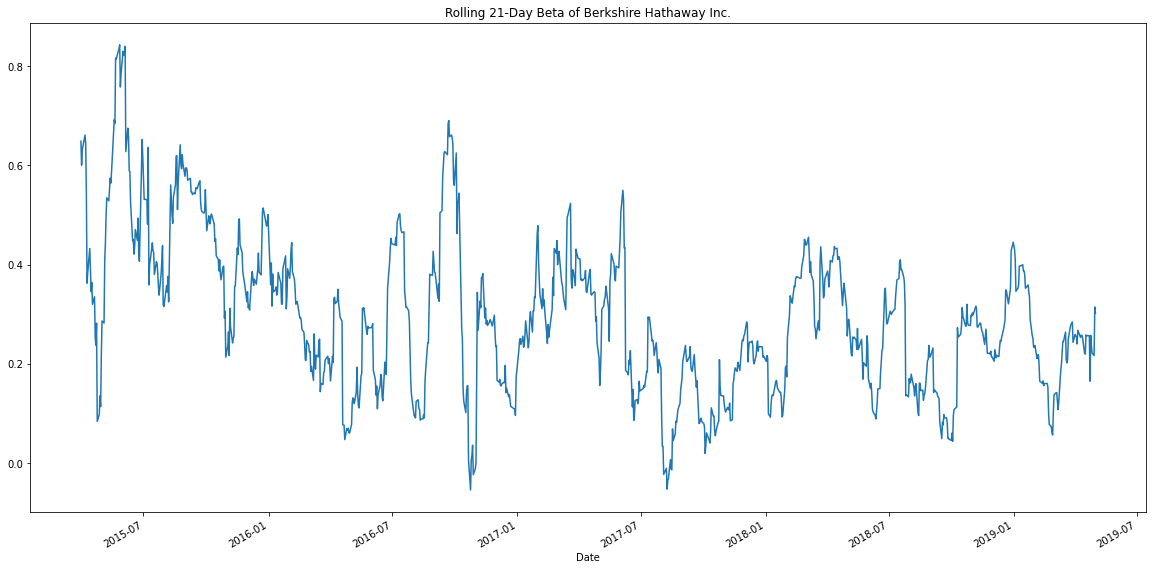

In [45]:
# Plot beta trend
rolling_beta = berk_rolling_covariance / berk_rolling_var
rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of Berkshire Hathaway Inc.')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

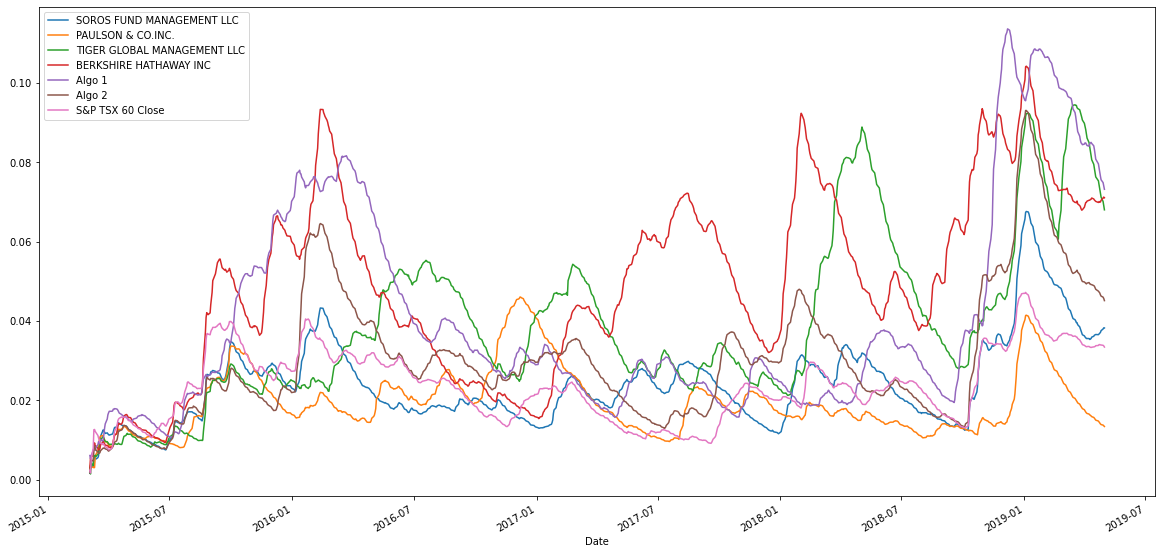

In [46]:
# Use `ewm` to calculate the rolling window
cumulative_returns.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Annualized Sharpe Ratios
##using S&P TSX 60 as the benchmark. This is an acceptable measure of risk-free risk, as in this model it represents a baseline for market performance. While long-term T-Bills are the standard measure of benchmark risk for the market, within this model this still allows us to measure the relative risk of these portfolios.
sharpe_ratios = ((combined.mean()-combined['S&P TSX 60 Close'].mean()) * 252) / (combined.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.110980
PAULSON & CO.INC.             -0.744596
TIGER GLOBAL MANAGEMENT LLC   -0.270851
BERKSHIRE HATHAWAY INC         0.359795
Algo 1                         1.310258
Algo 2                         0.231615
S&P TSX 60 Close               0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

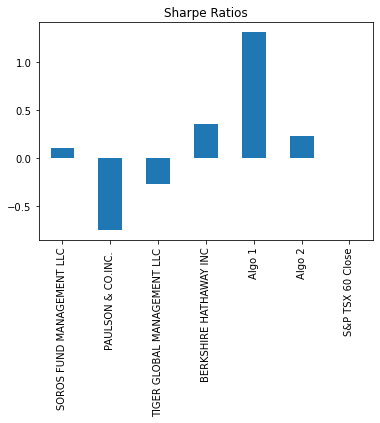

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algorithmic strategy 1 outperforms all other portfolios and the S&P TSX 60 in terms of earnings per unit of risk. Algorithmic strategy 2 outperforms all portfolios except that of Berkshire Hathaway Inc.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [49]:
import yfinance as yf

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# Reading data from 1st stock
shop = yf.download("SHOP", "2015-03-02", "2019-05-01")

[*********************100%***********************]  1 of 1 completed


In [51]:
shop = shop.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
shop_rtns = shop.pct_change()
shop_rtns.tail()

,Close
Date,
2019-04-24,-0.016246
2019-04-25,-0.003821
2019-04-26,0.015116
2019-04-29,0.015791
2019-04-30,0.078569


In [52]:
# Reading data from 2nd stock
otex = yf.download("OTEX", "2015-03-02", "2019-05-01")

[*********************100%***********************]  1 of 1 completed


In [53]:
otex = otex.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
otex_rtns = otex.pct_change()
otex_rtns.tail()

,Close
Date,
2019-04-24,0.000525
2019-04-25,0.005506
2019-04-26,0.001825
2019-04-29,-0.003904
2019-04-30,0.004703


In [54]:
# Reading data from 3rd stock
lob = yf.download("L", "2015-05-01", "2019-05-01")

[*********************100%***********************]  1 of 1 completed


In [55]:
lob = lob.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
lob_rtns = lob.pct_change()
lob_rtns.tail()

,Close
Date,
2019-04-24,0.001011
2019-04-25,0.003839
2019-04-26,0.010064
2019-04-29,0.014946
2019-04-30,0.007069


In [56]:
# Combine all stocks in a single DataFrame
comb = pd.concat([shop_rtns, otex_rtns, lob_rtns], axis="columns", join="outer")

In [57]:
# Reset Date index
comb.reset_index(inplace=True)
comb.tail()

,Date,Close,Close,Close
1044,2019-04-24,-0.016246,0.000525,0.001011
1045,2019-04-25,-0.003821,0.005506,0.003839
1046,2019-04-26,0.015116,0.001825,0.010064
1047,2019-04-29,0.015791,-0.003904,0.014946
1048,2019-04-30,0.078569,0.004703,0.007069


In [58]:
# Reorganize portfolio data by having a column per symbol
columns = [ "Date", "SHOP", "OTEX", "L"]
comb.columns = columns
comb.tail()

,Date,SHOP,OTEX,L
1044,2019-04-24,-0.016246,0.000525,0.001011
1045,2019-04-25,-0.003821,0.005506,0.003839
1046,2019-04-26,0.015116,0.001825,0.010064
1047,2019-04-29,0.015791,-0.003904,0.014946
1048,2019-04-30,0.078569,0.004703,0.007069


In [59]:
# Calculate daily returns
##this was done above, before concatenation.

# Drop NAs
comb = comb.dropna()

# Display sample data
comb.head()

,Date,SHOP,OTEX,L
57,2015-05-21,0.510588,-0.133673,-0.002915
58,2015-05-22,0.102414,0.013899,-0.008526
59,2015-05-26,0.047333,-0.006738,-0.015971
60,2015-05-27,-0.072513,-0.007485,0.004494
61,2015-05-28,-0.001818,0.002357,0.002486


In [60]:
#set index to date 
comb = comb.set_index(comb["Date"])
comb = comb.drop(columns=["Date"])
comb.tail()

,SHOP,OTEX,L
Date,,,
2019-04-24,-0.016246,0.000525,0.001011
2019-04-25,-0.003821,0.005506,0.003839
2019-04-26,0.015116,0.001825,0.010064
2019-04-29,0.015791,-0.003904,0.014946
2019-04-30,0.078569,0.004703,0.007069


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [64]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_returns = comb.dot(weights)

# Display sample data
port_returns

Date
2015-05-21    0.124667
2015-05-22    0.035929
2015-05-26    0.008208
2015-05-27   -0.025168
2015-05-28    0.001008
                ...   
2019-04-24   -0.004903
2019-04-25    0.001841
2019-04-26    0.009002
2019-04-29    0.008944
2019-04-30    0.030114
Length: 992, dtype: float64

In [67]:
new_port = pd.DataFrame(port_returns)
new_port

,0
Date,
2015-05-21,0.124667
2015-05-22,0.035929
2015-05-26,0.008208
2015-05-27,-0.025168
2015-05-28,0.001008
...,...
2019-04-24,-0.004903
2019-04-25,0.001841
2019-04-26,0.009002


In [70]:
columns = ["New Portfolio"]
new_port.columns = columns
new_port

,New Portfolio
Date,
2015-05-21,0.124667
2015-05-22,0.035929
2015-05-26,0.008208
2015-05-27,-0.025168
2015-05-28,0.001008
...,...
2019-04-24,-0.004903
2019-04-25,0.001841
2019-04-26,0.009002


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [71]:
# Join your returns DataFrame to the original returns DataFrame
all = pd.concat([combined, new_port],axis="columns", join="inner")
all

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Close,New Portfolio
Date,,,,,,,,
2015-05-21,0.002225,0.003178,0.000917,0.004597,0.006866,-0.000162,0.008677,0.124667
2015-05-22,0.000542,0.000292,0.000734,0.005268,-0.007780,-0.003892,-0.000187,0.035929
2015-05-26,-0.008718,0.000968,-0.007167,-0.003362,-0.004471,-0.009913,-0.008994,0.008208
2015-05-27,0.005536,0.003383,0.005831,0.003505,0.000935,0.010525,0.003964,-0.025168
2015-05-28,-0.001599,0.000619,-0.001491,-0.008909,0.003087,0.001252,-0.000230,0.001008
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,-0.004903
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.001841
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.009002


In [72]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

##this was done above
all.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX 60 Close               0
New Portfolio                  0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [73]:
# Calculate the annualized `std`
all_std = all.std()
all_std = all_std.sort_values()


all_ann_std = all_std * np.sqrt(252)
all_ann_std = all_ann_std.sort_values()

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

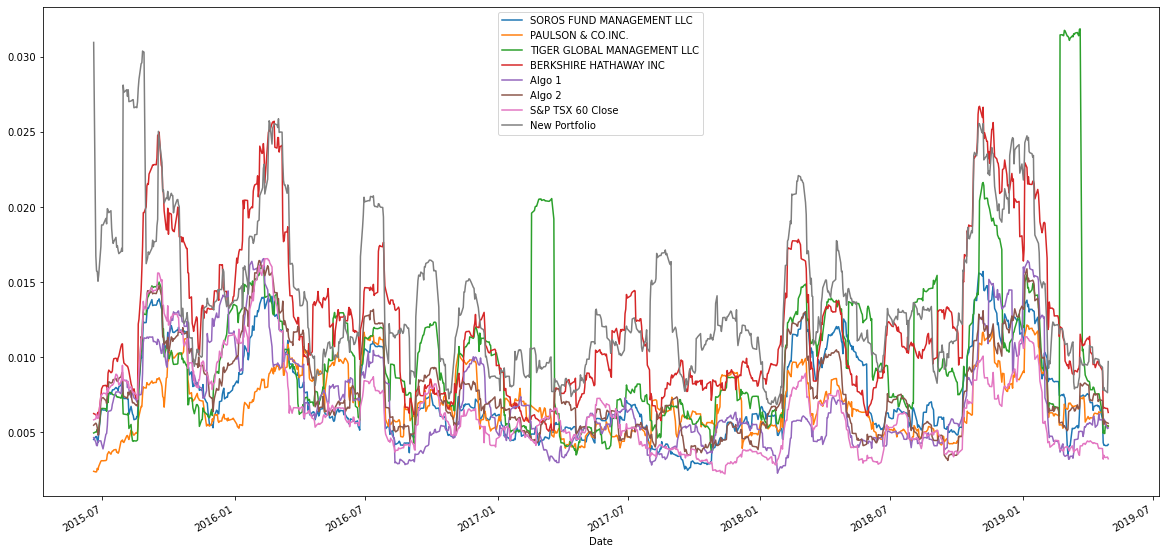

In [74]:
# Calculate rolling standard deviation
all.rolling(window=21).std()
# Plot rolling standard deviation
all.rolling(window=21).std().plot(kind="line", figsize=(20,10))

### Calculate and plot the correlation

In [75]:
# Calculate and plot the correlation
all_corr = all.corr()
all_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Close,New Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.696595,0.555993,0.749106,0.315363,0.827694,0.674378,0.593548
PAULSON & CO.INC.,0.696595,1.000000,0.428403,0.537816,0.271238,0.673942,0.486255,0.442211
TIGER GLOBAL MANAGEMENT LLC,0.555993,0.428403,1.000000,0.418249,0.161211,0.500331,0.437683,0.357789
BERKSHIRE HATHAWAY INC,0.749106,0.537816,0.418249,1.000000,0.292134,0.682814,0.556417,0.595071
Algo 1,0.315363,0.271238,0.161211,0.292134,1.000000,0.292396,0.312074,0.212689
Algo 2,0.827694,0.673942,0.500331,0.682814,0.292396,1.000000,0.739976,0.601766
S&P TSX 60 Close,0.674378,0.486255,0.437683,0.556417,0.312074,0.739976,1.000000,0.529647
New Portfolio,0.593548,0.442211,0.357789,0.595071,0.212689,0.601766,0.529647,1.000000


<AxesSubplot:>

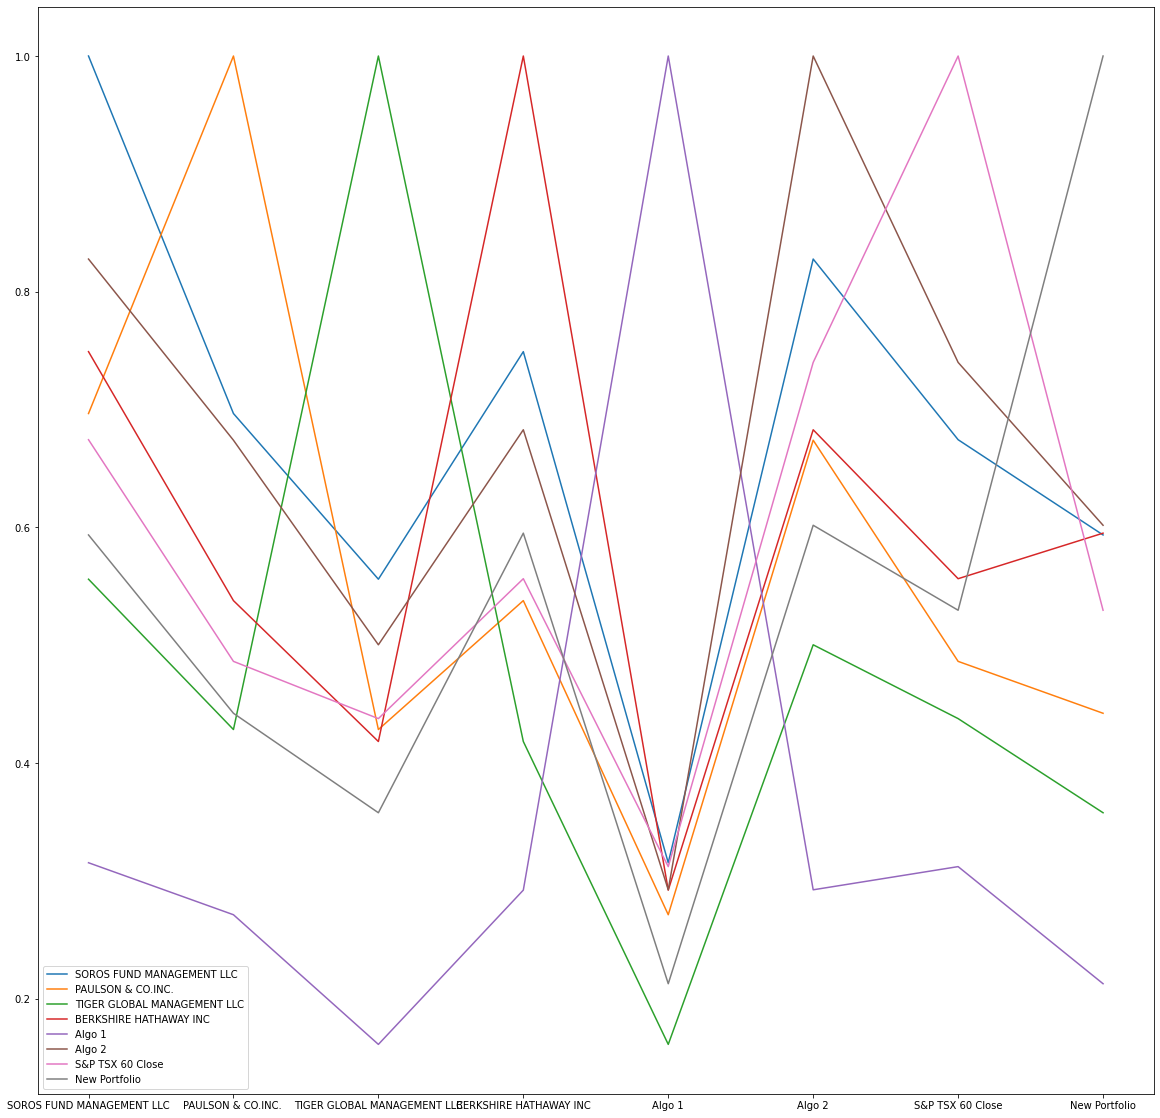

In [76]:
all_corr.plot(figsize=(20,20))

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of New Portfolio Against S&P 60 TSX'}, xlabel='Date'>

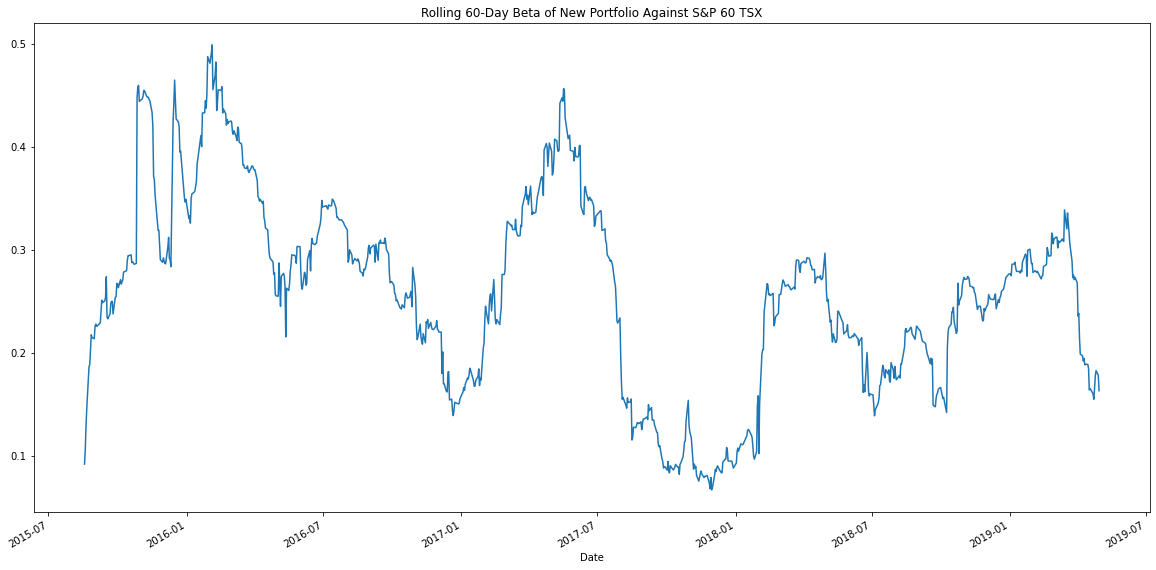

In [78]:
# Calculate and plot Beta
all_rolling_var = all['New Portfolio'].rolling(window=60).var()
all_rolling_var.tail(10)

all_rolling_covariance = all['New Portfolio'].rolling(window=60).cov(all['S&P TSX 60 Close'])

all_beta_roll = all_rolling_covariance / all_rolling_var
all_beta_roll.plot(figsize=(20, 10), title='Rolling 60-Day Beta of New Portfolio Against S&P 60 TSX')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [79]:
# Calculate Annualzied Sharpe Ratios
all_sharpe_ratios = ((all.mean()-all['S&P TSX 60 Close'].mean()) * 252) / (all.std() * np.sqrt(252))
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.028861
PAULSON & CO.INC.             -0.888793
TIGER GLOBAL MANAGEMENT LLC   -0.326735
BERKSHIRE HATHAWAY INC         0.338811
Algo 1                         1.276997
Algo 2                         0.194551
S&P TSX 60 Close               0.000000
New Portfolio                  1.326838
dtype: float64

<AxesSubplot:>

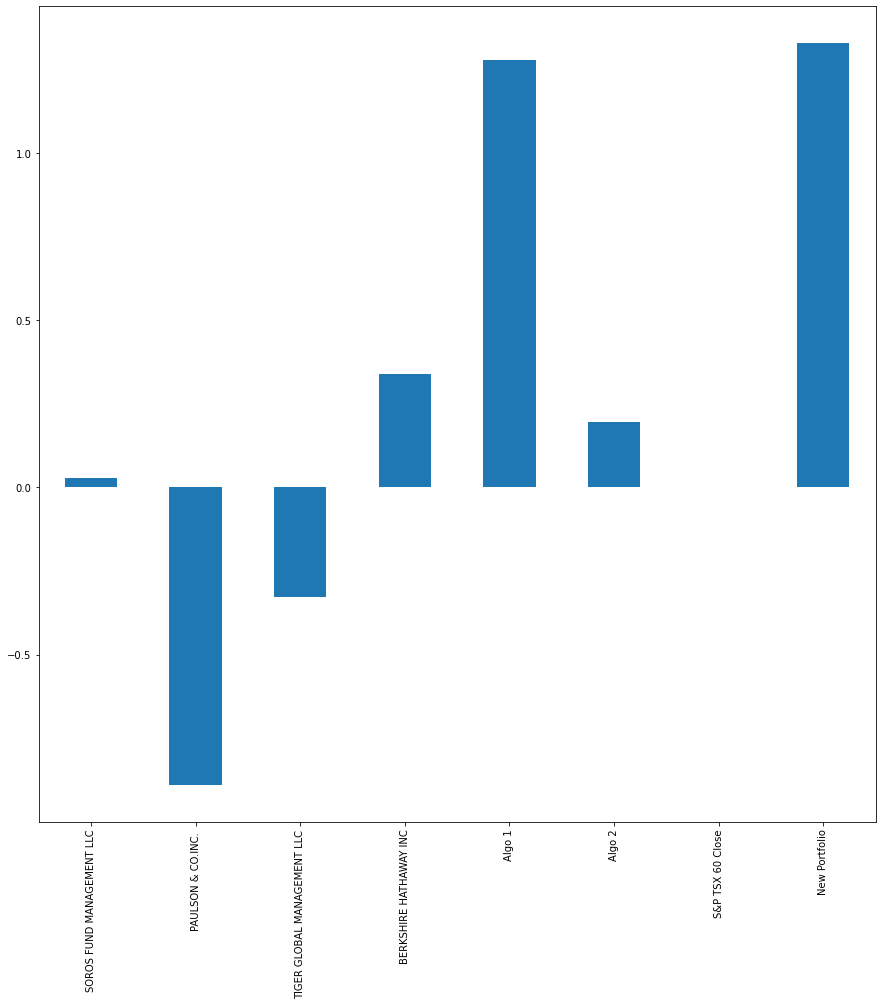

In [80]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar", figsize=(15,15))

### How does your portfolio do?

Write your answer here!

In [82]:
# New Portfolio, consisting of Shopify, Loblaws, and Open Text appears to be the best performing portfolio for the give date range [2015-03-02 - 2019-05-01]